## Oppstart

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [2]:
from module_update import update, css

In [3]:
css()

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Note that the file `nbtext.py` will be overwritten in the code below

This is probably ok, though. If not, change `update('nbtext', overwrite = True)` to `update('nbtext', overwrite = False)` and the file will stay unchanged. 


In [5]:
update('graph_networkx_louvain')
update('nbtext', overwrite = True)
update('token_map', overwrite = True)
import nbtext as nb
import token_map as tm
from nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


Updated file `D:\Documents\GitHub\NER\graph_networkx_louvain.py`

Updated file `D:\Documents\GitHub\NER\nbtext.py`

Updated file `D:\Documents\GitHub\NER\token_map.py`

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)


# Eksempel

I eksemplet ser vi først på en tilfeldig bok, deretter mulighetene for å gjøre det samme med et helt korpus.

## Korpus

Bygg først et korpus, enten fra `

In [6]:
korpus = nb.book_corpus(author='hamsun%')

In [7]:
#korpus = nb.restore_metadata_from_excel('metadatafil.xls')

## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det. Her går urnene gjennom `nb.pure_urn` -  i fremtiden skal det ikke være nødvendig.

In [8]:
nb.urn_concordance(word = 'arbeid', urns = nb.pure_urn(korpus))

"Knut Hamsun som han var, Hamsun, Knut, 1956",distraherte ham i hans litterære,arbeid,. Han begynte å innskrenke
"Knut Hamsun som han var, Hamsun, Knut, 1956",tok fatt på et anstrengende,arbeid,. Alltid skrev han en
"Knut Hamsun som han var, Hamsun, Knut, 1956",gjennem et intenst og oppslitende,arbeid,hadde skapt seg sitt eget
"Knut Hamsun som han var, Hamsun, Knut, 1956",seg distrahere i sitt egentlige,arbeid,. I grunnen var det
"Knut Hamsun som han var, Hamsun, Knut, 1956","skolelærer , og alt sitt",arbeid,skjøttet han med alvor og
"Efter år og dag, Hamsun, Tore, 1990",når han satt i hårdt,arbeid,. Derfor vil jeg allerede
"Efter år og dag, Hamsun, Tore, 1990",Hamsuns berømte navn og det,arbeid,han nedla for å gjøre
"Efter år og dag, Hamsun, Tore, 1990",enn ham gikk til et,arbeid,han elsket . Og det
"Efter år og dag, Hamsun, Tore, 1990",", tegning , lek og",arbeid,ved dette kjære gamle bordet
"Efter år og dag, Hamsun, Tore, 1990",på sin stolthet over det,arbeid,som var nedlagt og som
"Bygdebarn om vinteren, Hamsun, Marie, 1942",var hun så smått i,arbeid,"igjen , ungt kjøtt gror"


## Navn

Finn forslag til navn med `names`. Se på dem med `show_names`. Her er det muligheter til å skru litt på parametrene. Hvis ratioen skrus ned fjernes en del ord, og om cutoff settes høyere vil også enkelte navneforslag kunne forsvinne.

In [9]:
korpus['urn'][0]

2010121406011

In [21]:
BOOK = nb.pure_urn(korpus['urn'])[11]

In [22]:
navn = nb.names(BOOK, ratio=0.2, cutoff=2)
tm.show_names(navn)

Lag 1

    Einar - 258
    Martha - 153
    Henry - 94
    Jakob - 84
    Ingrid - 66
    Inger - 61
    Langerud - 35
    Jon - 29
    Jakobs - 19
    Miraklet - 19
    Ingeborg - 16
    Einars - 15
    Gudbrand-Gusta - 15
    Gusta - 13
    Olas - 12
    Alfred - 10
    Gulla - 10
    Randi - 10
    Blakken - 9
    Gudbrand - 9
    Lars - 9
    Minda - 8
    Bygdebarn - 7
    Marthas - 7
    Hofset - 6
    Ingers - 6
    Malla - 6
    Drive - 5
    Ingrids - 5
    Josef - 5
    Mordet - 4
    Snøfrid - 4
    Coogan - 3
    Gudbrandstua - 3
    Gusta-Gudbrand - 3
    Hof - 3
    Langerudsætra - 3
    Nygård - 3
    Vårherre - 3

Lag 2

    Einar Langerud - 2
    Minda Hof - 2
    Randi Nygård - 2
    Ingrid Langerud - 1
    Martha Langerud - 1
    Lars Hofset - 1
    Minda Hofset - 1
    Henry Mordet - 1
    Lars Hof - 1

Lag 3


Lag 4




Listen trenger litt redigering, og sammenslåing.

In [23]:
tm.names_to_token_map_file(navn, filename="en_bok12.xls")

(Counter({'Einar': 258, 'Martha': 153, 'Henry': 94, 'Jakob': 84, 'Ingrid': 66, 'Inger': 61, 'Langerud': 35, 'Jon': 29, 'Jakobs': 19, 'Miraklet': 19, 'Ingeborg': 16, 'Einars': 15, 'Gudbrand-Gusta': 15, 'Gusta': 13, 'Olas': 12, 'Alfred': 10, 'Gulla': 10, 'Randi': 10, 'Blakken': 9, 'Gudbrand': 9, 'Lars': 9, 'Minda': 8, 'Bygdebarn': 7, 'Marthas': 7, 'Hofset': 6, 'Ingers': 6, 'Malla': 6, 'Drive': 5, 'Ingrids': 5, 'Josef': 5, 'Mordet': 4, 'Snøfrid': 4, 'Coogan': 3, 'Gudbrandstua': 3, 'Gusta-Gudbrand': 3, 'Hof': 3, 'Langerudsætra': 3, 'Nygård': 3, 'Vårherre': 3}), Counter({('Einar', 'Langerud'): 2, ('Minda', 'Hof'): 2, ('Randi', 'Nygård'): 2, ('Ingrid', 'Langerud'): 1, ('Martha', 'Langerud'): 1, ('Lars', 'Hofset'): 1, ('Minda', 'Hofset'): 1, ('Henry', 'Mordet'): 1, ('Lars', 'Hof'): 1}), Counter(), Counter())


True

### Redigeringsaktivitet

Rediger filen fra cellen med lagringskommando (`names_to_token_map_file(....)`)
Åpne i for eksempel i excel eller tilsvarende som for eksempel openoffice eller libreoffice. Etter redigering, kjøres cellen under. Husk bare å benytte riktig filnavn. 

In [24]:
redigerte_navn = tm.read_token_map_file("en_bok12.xls")

Listen med redigerte navn går inn i grafen - vi tar med oss variabelen BOOK defineret over sammen listen:

In [25]:
G = tm.character_network(BOOK, redigerte_navn)

Dernest kan den vises og analyseres med passende kommandoer

NodeView(())

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


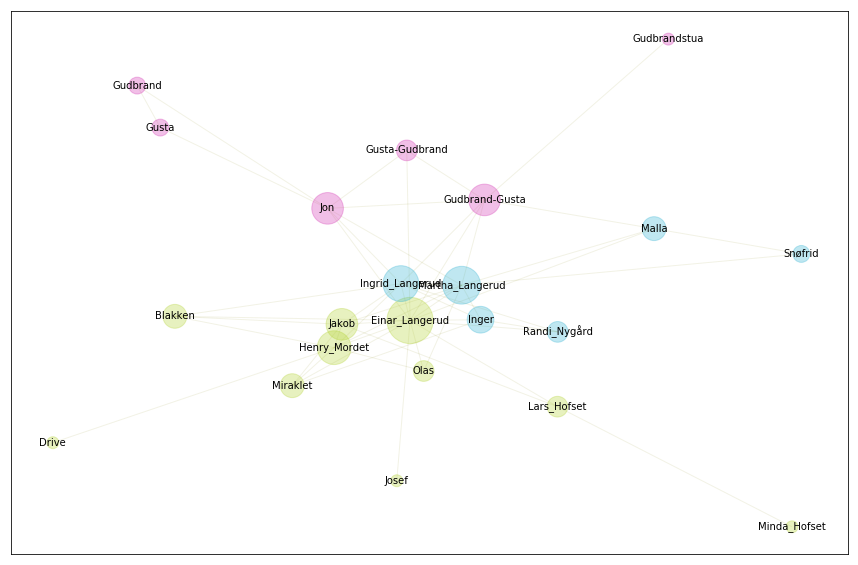

In [26]:
gnl.show_graph(G)

In [ ]:
gnl.show_communities(G)